# STAT 201 Deliverable 2: Project Proposal
**Group 48**: Eric Liu, Norman Vo, Garreth Lee
<br>

### 500 Words Total (Intro + Methods)

## Introduction

**From the website:**
- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.
- Clearly state the question you will try to answer with your project.
    - Include one or more random variables of interest, spread across two or more categories that are interesting to compare.
    - Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) Justify your choices.
    - If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. 
    - Comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable).
    - In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. 
    - Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).
- Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need
- Frame your question/objectives in terms of what is already known in the literature. 
    - Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section).
    - We have no specific citation style requirements, but be consistent.

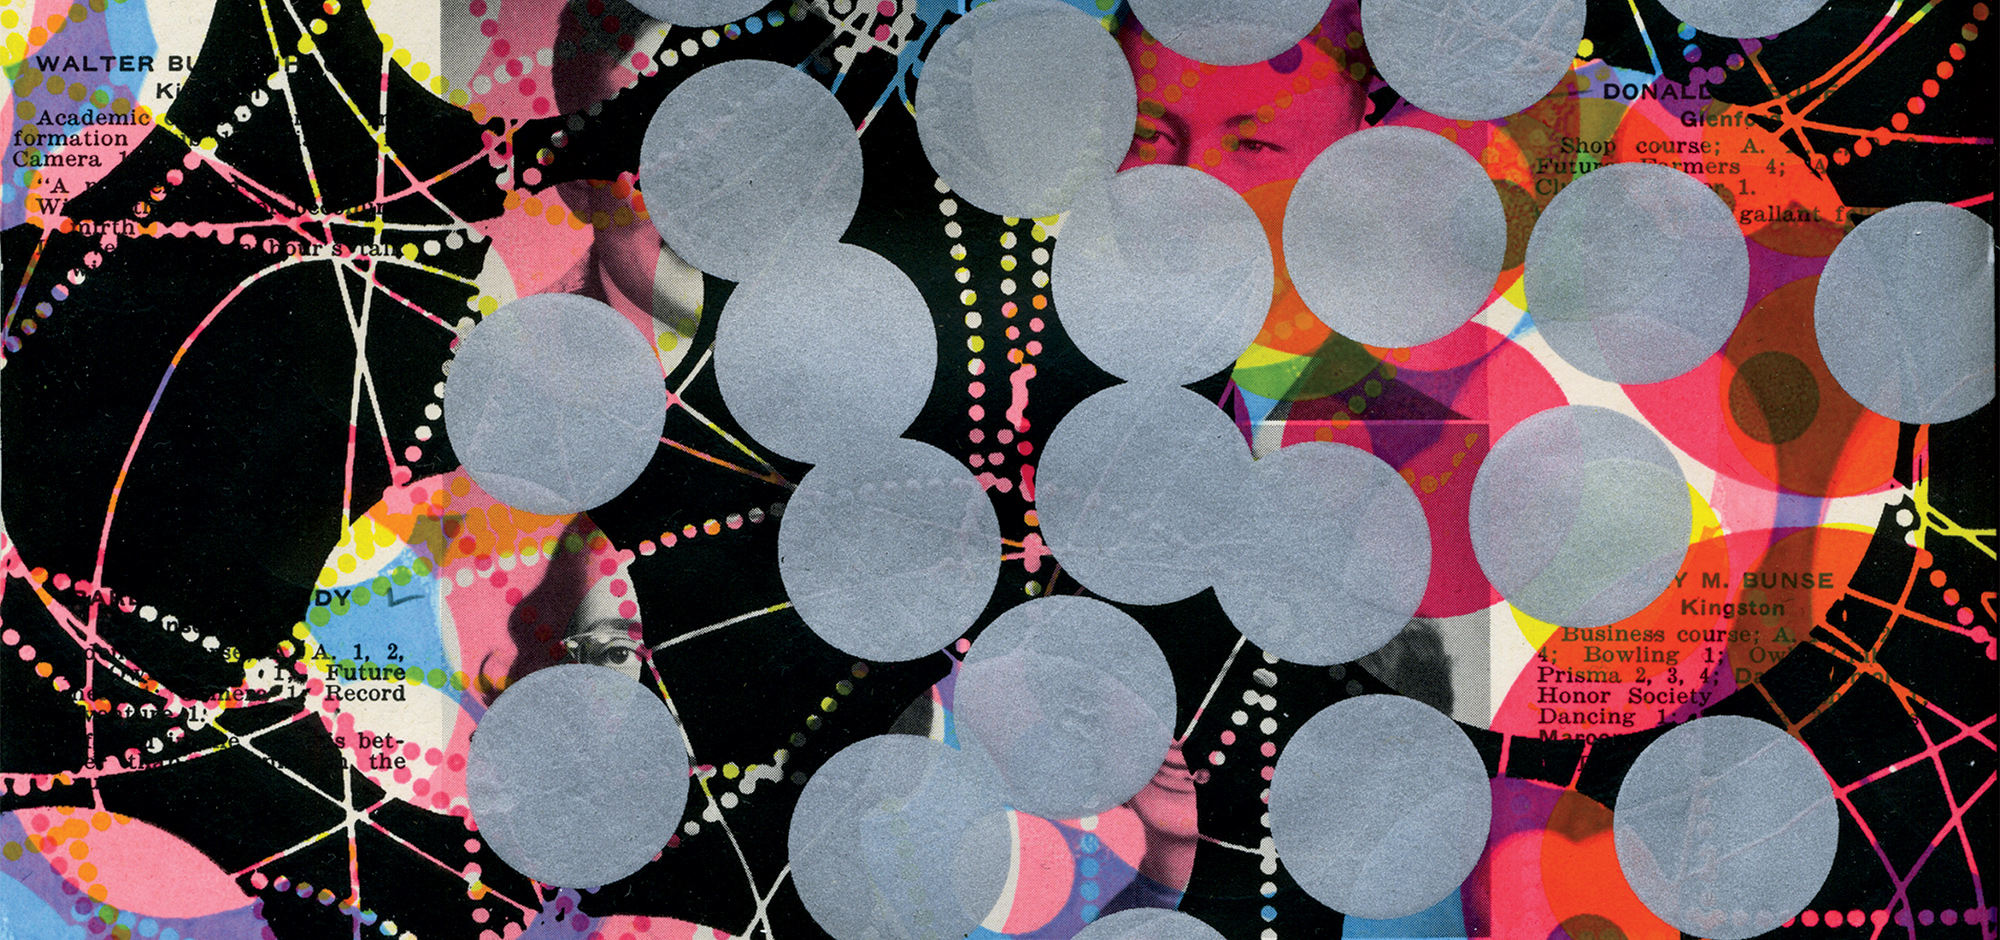

In 2012, [Harvard Business Review](https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century) labelled data science as "*The Sexiest Job of the 21st Century*", which coincided with the rising importance of big data and the ability to process it, which can generate millions of dollars in revenue if wielded properly. As such, people who work in these positions are paid large salaries due to the revenue they are able to generate from their insights. 

However, "data science" is an extremely broad term that can encompass many different professions, such as data scientists, data engineers, machine learning engineers, data analysts, and many more. Despite working with (largely) similar tools and knowledge, there is a pretty wide range of pay depending on various factors, including location, skills used, and job titles. Smith (348) notes that the job title, which would naturally be evaluated first, sets an initial expectation for the value of the job itself. This means that a small difference in a data science job title can affect its salary, even if the work done is largely similar to other titles. Gerhart (424) also found that controlling for job titles mediated a lot of the variation in salaries amongst industry professionals, indicating that it is a large contributing factor towards pay amount.This project seeks to examine the differences between mean salaries of different job titles in the data science industry, and highlight any significant findings.

Thus, the main question of our project:

# Is there a significant difference among the average salaries of different data science jobs? What are the factors that affect it?`

---

### (own reference) Dataset:
https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor\

### Questions:
- Is there a difference among the average salaries of different job titles in the data science industry?
    - **Response Variable:** Salary
        - **Location Parameter:** Mean
        - **Scale Parameter:** Inter-quartile Range (?)
    - **Explanatory Variable:** Job Titles


## Preliminary Results
In this section, you will:
- Demonstrate that the dataset can be read from the web into R.
- Clean and wrangle your data into a tidy format.
- Plot the relevant raw data, tailoring your plot in a way that addresses your question.
- Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
Be sure to not print output that takes up a lot of screen space.

In [1]:
# Import Libraries
library(cowplot)
library(digest)
library(infer)
library(repr)
library(tidyverse)

In [27]:
ds_df <- read_csv("datascience.csv")
names(ds_df) <- make.names(names(ds_df), unique=TRUE)
head(ds_df)[-c(4)] # Remove Job Description Column for visual purposes (due to length)

Rows: 742 Columns: 42
── Column specification ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (17): Job Title, Salary Estimate, Job Description, Company Name, Locatio...
dbl (25): index, Rating, Founded, Hourly, Employer provided, Lower Salary, U...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


index Job.Title                 Salary.Estimate             Rating
1 0     Data Scientist            $53K-$91K (Glassdoor est.)  3.8   
2 1     Healthcare Data Scientist $63K-$112K (Glassdoor est.) 3.4   
3 2     Data Scientist            $80K-$90K (Glassdoor est.)  4.8   
4 3     Data Scientist            $56K-$97K (Glassdoor est.)  3.8   
5 4     Data Scientist            $86K-$143K (Glassdoor est.) 2.9   
6 5     Data Scientist            $71K-$119K (Glassdoor est.) 3.4   
  Company.Name                               Location        Headquarters  
1 Tecolote Research\n3.8                     Albuquerque, NM Goleta, CA    
2 University of Maryland Medical System\n3.4 Linthicum, MD   Baltimore, MD 
3 KnowBe4\n4.8                               Clearwater, FL  Clearwater, FL
4 PNNL\n3.8                                  Richland, WA    Richland, WA  
5 Affinity Solutions\n2.9                    New York, NY    New York, NY  
6 CyrusOne\n3.4                              Dallas, TX      Dallas, TX    
  Size        Founded Type.of.ownership  ⋯ tensor hadoop tableau bi flink mongo
1 501 - 1000  1973    Company - Private  ⋯ 0      0      1       1  0     0    
2 10000+      1984    Other Organization ⋯ 0      0      0       0  0     0    
3 501 - 1000  2010    Company - Private  ⋯ 0      0      0       0  0     0    
4 1001 - 5000 1965    Government         ⋯ 0      0      0       0  0     0    
5 51 - 200    1998    Company - Private  ⋯ 0      0      0       0  0     0    
6 201 - 500   2000    Company - Public   ⋯ 0      0      0       1  0     1    
  google_an job_title_sim  seniority_by_title Degree
1 0         data scientist na                 M     
2 0         data scientist na                 M     
3 0         data scientist na                 M     
4 0         data scientist na                 na    
5 0         data scientist na                 na    
6 0         data scientist na                 na

In [28]:
# Subset & Clean
trim_df <- ds_df %>%
    select(Lower.Salary, Upper.Salary, Avg.Salary.K., job_title_sim) %>%
    rename(Lower_Salary=Lower.Salary, Upper_Salary=Upper.Salary, Avg_Salary=Avg.Salary.K., Job_Title=job_title_sim) %>%
    filter(Job_Title != "na")
head(trim_df)

Lower_Salary Upper_Salary Avg_Salary Job_Title     
1 53            91           72.0      data scientist
2 63           112           87.5      data scientist
3 80            90           85.0      data scientist
4 56            97           76.5      data scientist
5 86           143          114.5      data scientist
6 71           119           95.0      data scientist

In [29]:
as.vector(unique(trim_df$Job_Title))

[1] "data scientist"                 "other scientist"               
[3] "analyst"                        "data engineer"                 
[5] "data analitics"                 "data modeler"                  
[7] "Data scientist project manager" "machine learning engineer"     
[9] "director"

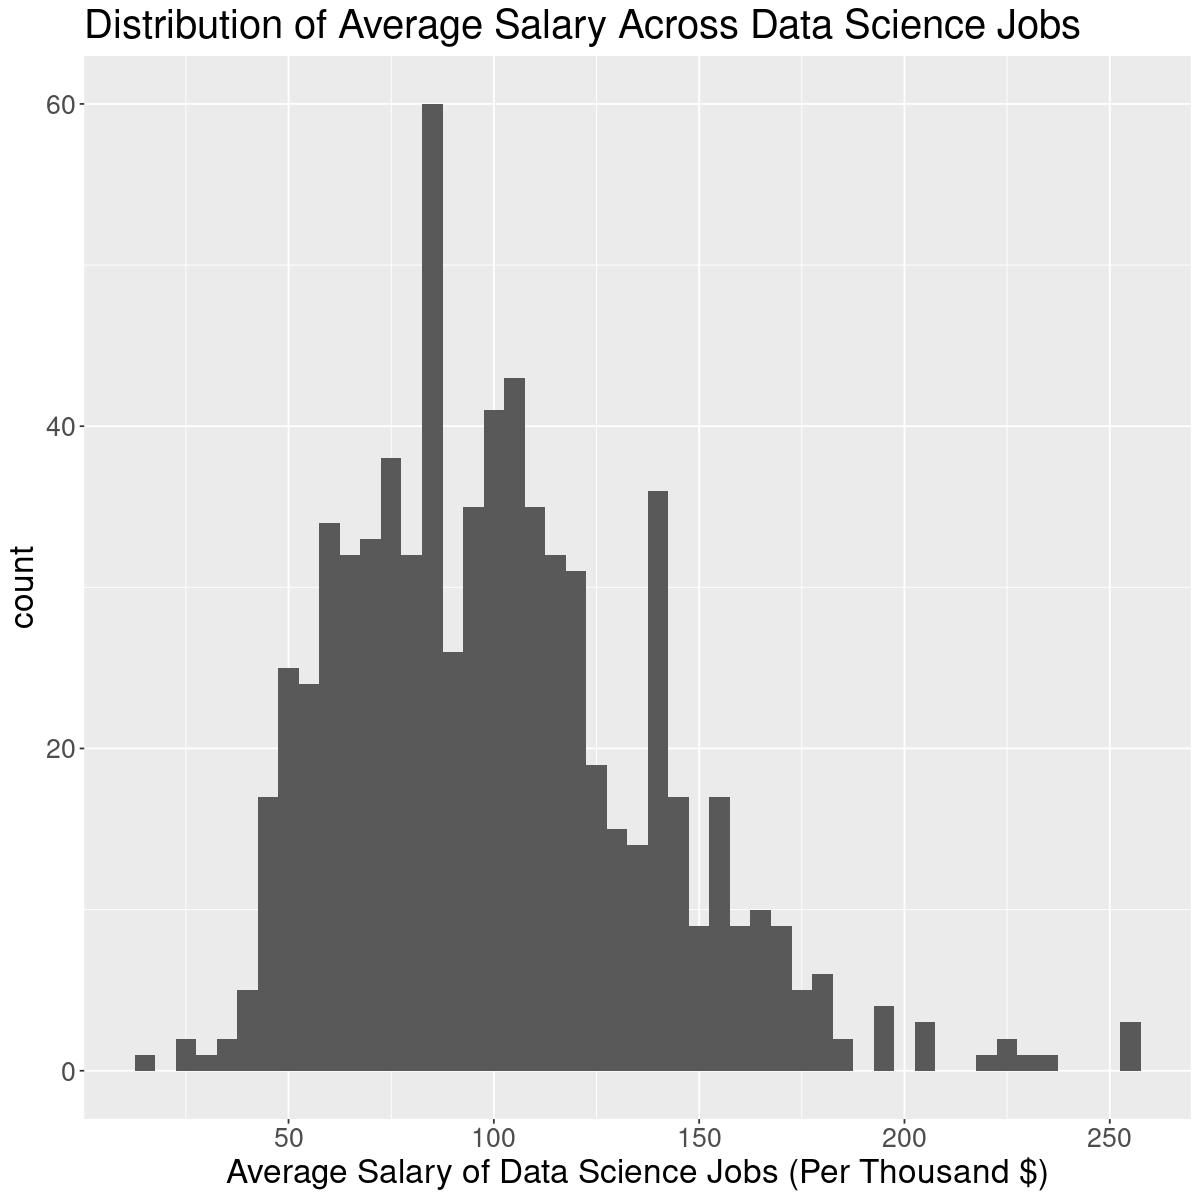

In [30]:
# Histogram of ALL Salaries
options(repr.plot.width=10, repr.plot.height=10)
ggplot(trim_df) +
    geom_histogram(aes(x = Avg_Salary), binwidth = 5) +
    xlab("Average Salary of Data Science Jobs (Per Thousand $)") +
    ggtitle("Distribution of Average Salary Across Data Science Jobs") + 
    theme(text = element_text(size=20))

In [31]:
# Separate dataframes for each job title (for reference, maybe remove?)
ds = filter(trim_df, Job_Title == "data scientist")
os = filter(trim_df, Job_Title == "other scientist")
an = filter(trim_df, Job_Title == "analyst")
de = filter(trim_df, Job_Title == "data engineer")
da = filter(trim_df, Job_Title == "data analitics")
dm = filter(trim_df, Job_Title == "data modeler")
dspm = filter(trim_df, Job_Title == "Data scientist project manager")
mle = filter(trim_df, Job_Title == "machine learning engineer")
dir = filter(trim_df, Job_Title == "director")

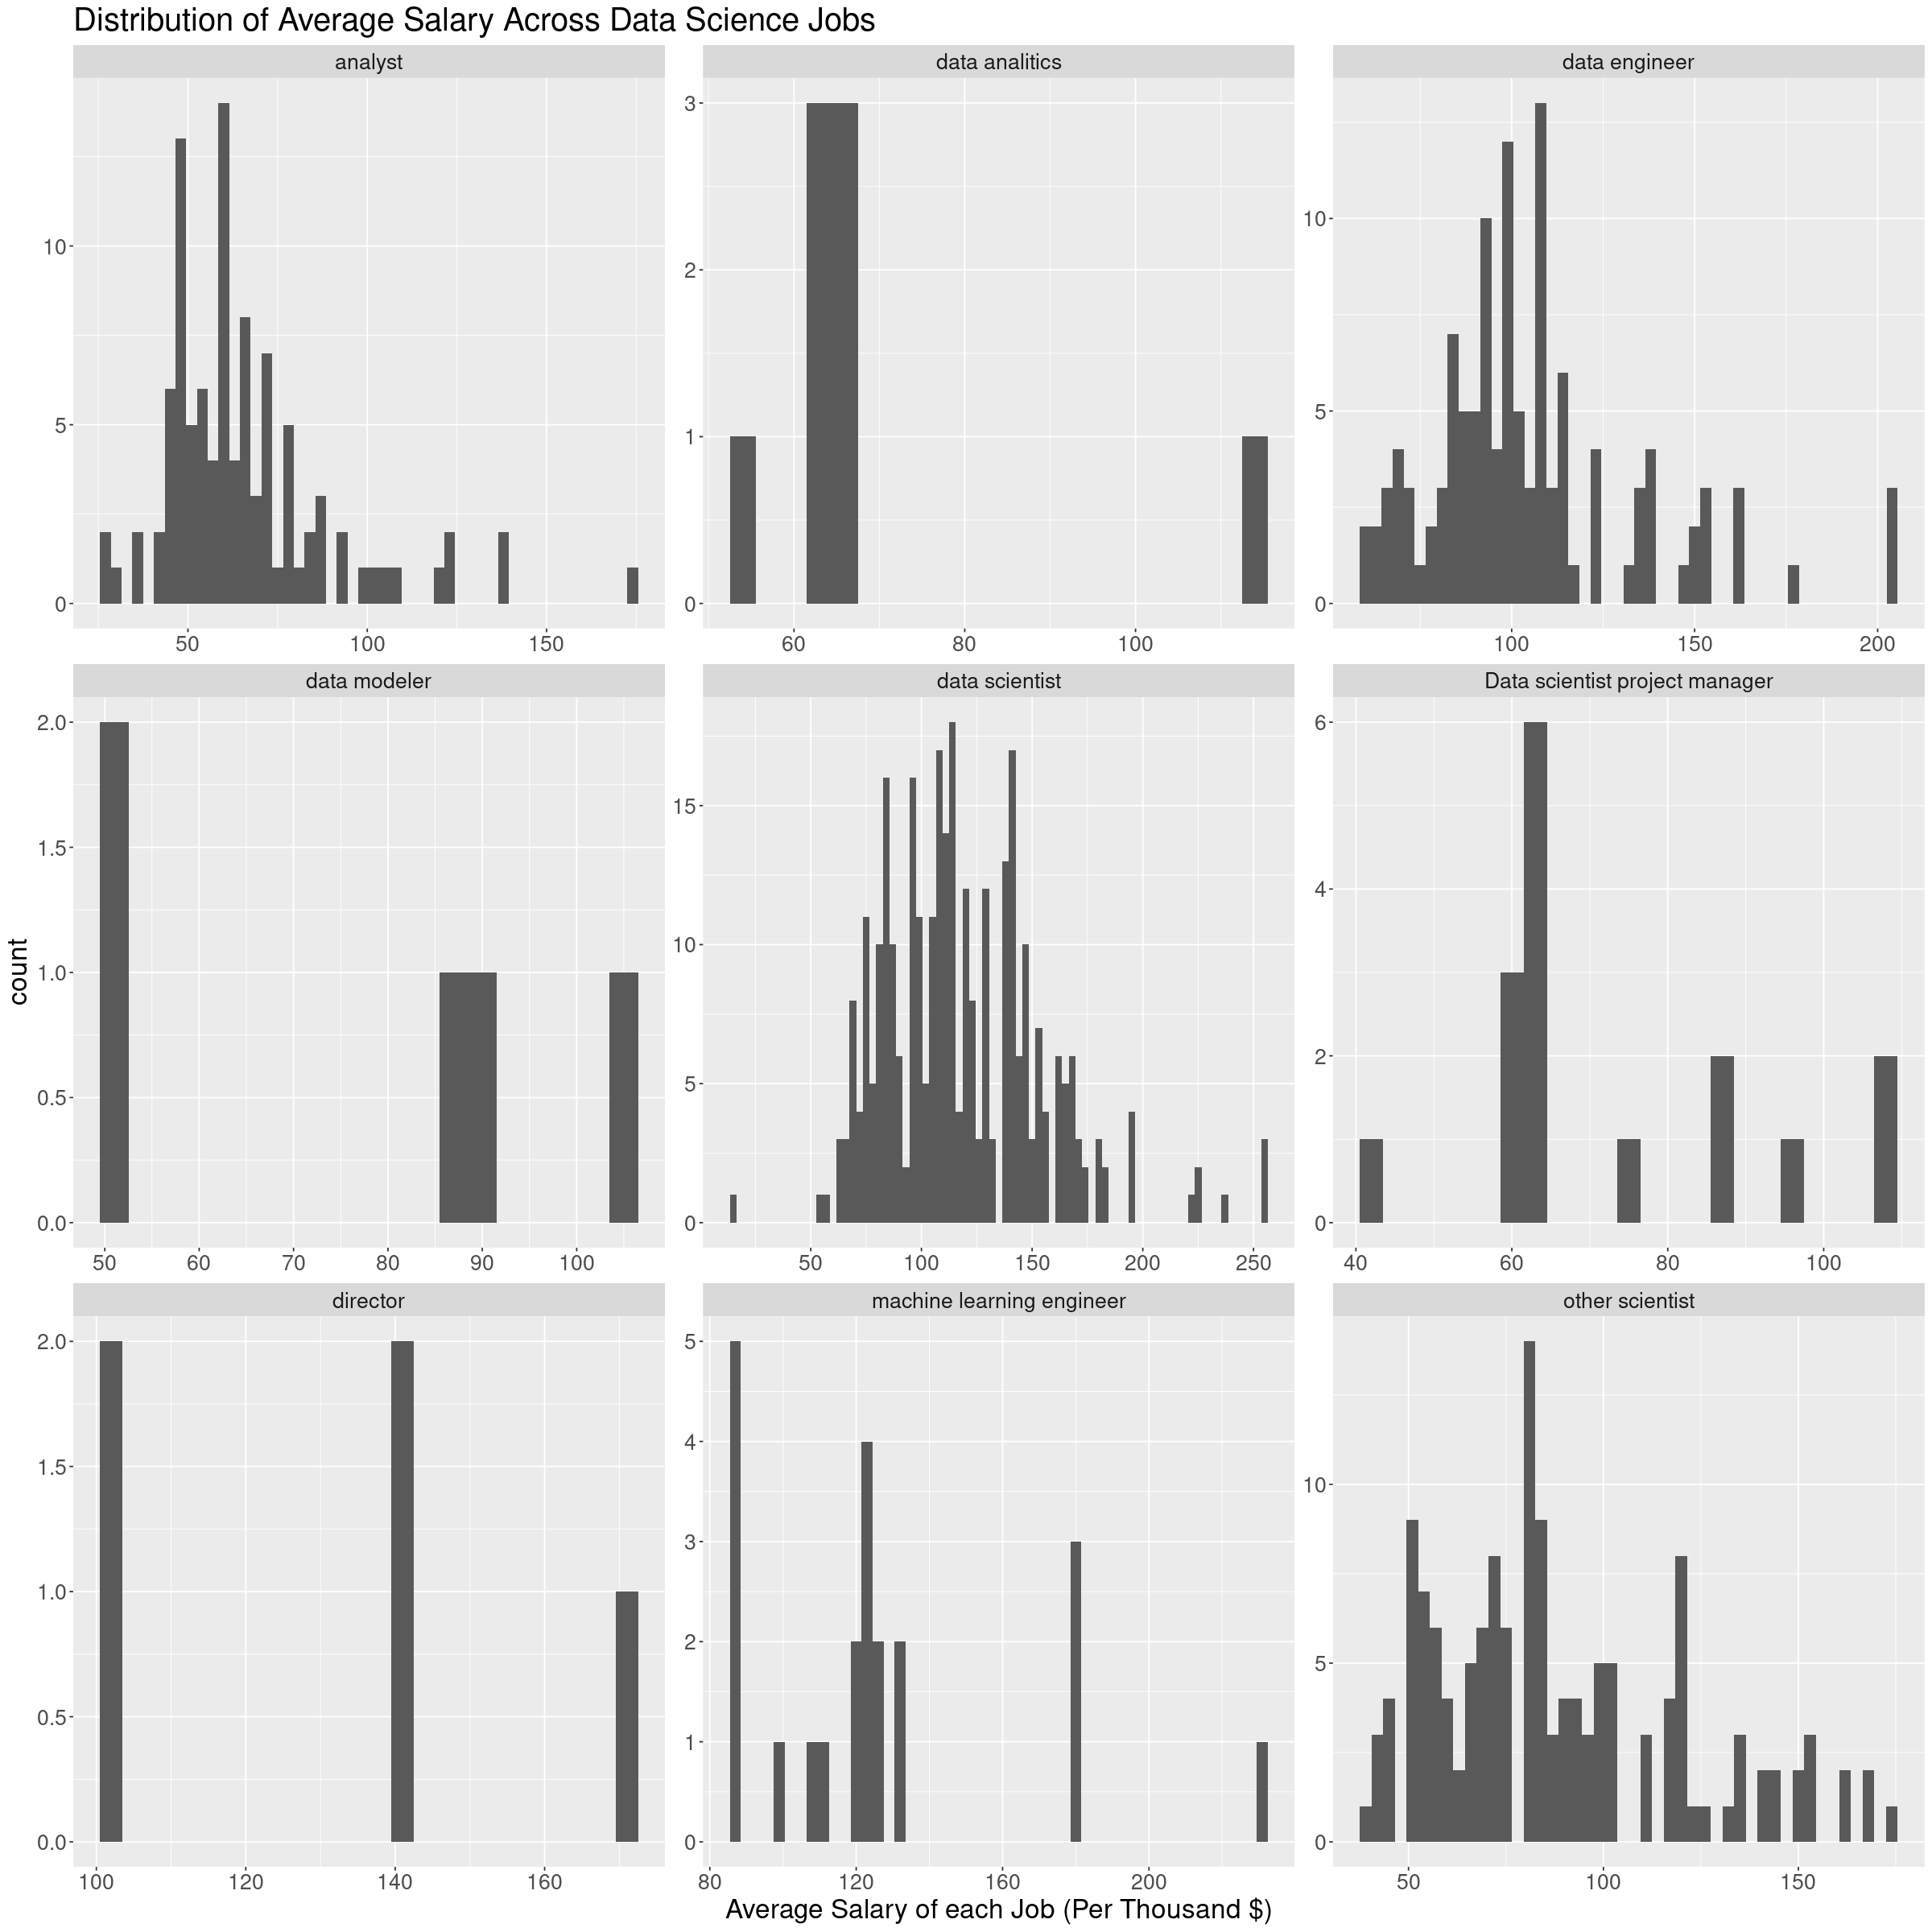

In [32]:
# Plotting each Distribution
options(repr.plot.width=20, repr.plot.height=20)
p1 <- ggplot(trim_df) +
    geom_histogram(aes(x = Avg_Salary), binwidth = 3) +
    xlab("Average Salary of each Job (Per Thousand $)") +
    ggtitle("Distribution of Average Salary Across Data Science Jobs") + 
    facet_wrap(~Job_Title, scale="free") +
    theme(text = element_text(size=20))
plot(p1)

In [33]:
# Perform Bootstrap Here (For each group)

In [34]:
# Sampling Distribution (Estimate Mean)

In [35]:
# IQR

## Methods (Plan)

In order to answer the question about whether there is a difference in the average salary across various job title in the data science industry, our group intend to calculate the mean salary for each job title, dub them $\mu_1$, $\mu_2$, $\mu_3$, $\mu_4$, $\mu_5$, $\mu_6$, $\mu_7$, $\mu_8$, $\mu_9$ (note to self, is there really 9 mus) proposes the following hypotheses:
- Null hypothesis: $\mu_1 = \mu_2 = \mu_3 = \mu_4 = \mu_5 = \mu_6 = \mu_7 = \mu_8 = \mu_9$
- Alternative hypothesis: $\mu_1 \neq \mu_2 \neq \mu_3 \neq \mu_4 \neq \mu_5 \neq \mu_6 \neq \mu_7 \neq \mu_8 \neq \mu_9$

In order to test our hypothesis, we will use the one-way ANOVA model to see if there's any difference between the means. Thus, the factor is going to be Job_title, which is our independent variable, and our dependent variable is the salary. Our factor can be divided into 9 groups (change this later). In each group, we will calculate the mean and the within-group variance. Additionally, we will calculate the between-group variance by comparing the mean of each group with the mean of the overall salary. With these two variance, we are able to calculate the F-statistic, which is ANOVA's test statistic, and as a result we can obtain the p-value to test our hypothesis.

## References

- Smith, Brien N., et al. “What Is in a Name: The Impact of Job Titles on Job Evaluation Results.” Journal of Business and Psychology, vol. 3, no. 3, 1989, pp. 341–51. JSTOR, http://www.jstor.org/stable/25092192. Accessed 9 Mar. 2023.
- Gerhart, B. (1990). Gender Differences in Current and Starting Salaries: The Role of Performance, College Major, and Job Title. ILR Review, 43(4), 418–433. https://doi.org/10.1177/001979399004300406